# **Import Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from collections import Counter
from scipy.stats import skew, kurtosis

# **Import Dataset**

In [ ]:
csv_file = "Stunting_Dataset(2).csv"
excel_file = "Stunting_Dataset(2).xlsx"

In [ ]:
df = pd.read_csv('/content/Stunting_Dataset(2).csv')
df.to_excel(excel_file, index=False)

In [ ]:
data = pd.read_excel('Stunting_Dataset(2).xlsx')
data.head(10)

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,female,56,2.9,50,11.0,90.0,Yes,No
1,female,20,3.3,49,11.1,80.5,No,No
2,male,4,2.8,48,6.5,63.0,No,No
3,female,14,2.0,49,7.0,71.0,Yes,No
4,male,32,3.2,49,11.0,88.7,Yes,No
5,male,30,2.3,50,12.0,90.0,Yes,No
6,male,2,2.9,49,8.5,74.2,Yes,No
7,male,33,2.5,49,10.0,91.5,No,Yes
8,male,33,3.0,50,15.0,96.0,Yes,No
9,female,15,4.0,51,5.9,58.3,Yes,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         6500 non-null   object 
 1   Age            6500 non-null   int64  
 2   Birth Weight   6500 non-null   float64
 3   Birth Length   6500 non-null   int64  
 4   Body Weight    6500 non-null   float64
 5   Body Length    6500 non-null   float64
 6   Breastfeeding  6500 non-null   object 
 7   Stunting       6500 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 406.4+ KB


In [ ]:
data['Stunting'].value_counts()

,count
Stunting,
Yes,3312
No,3188


**MAPPING DICTIONARY**

In [ ]:
label_mapping = data['Stunting'].unique()
label_mapping

array(['No', 'Yes'], dtype=object)

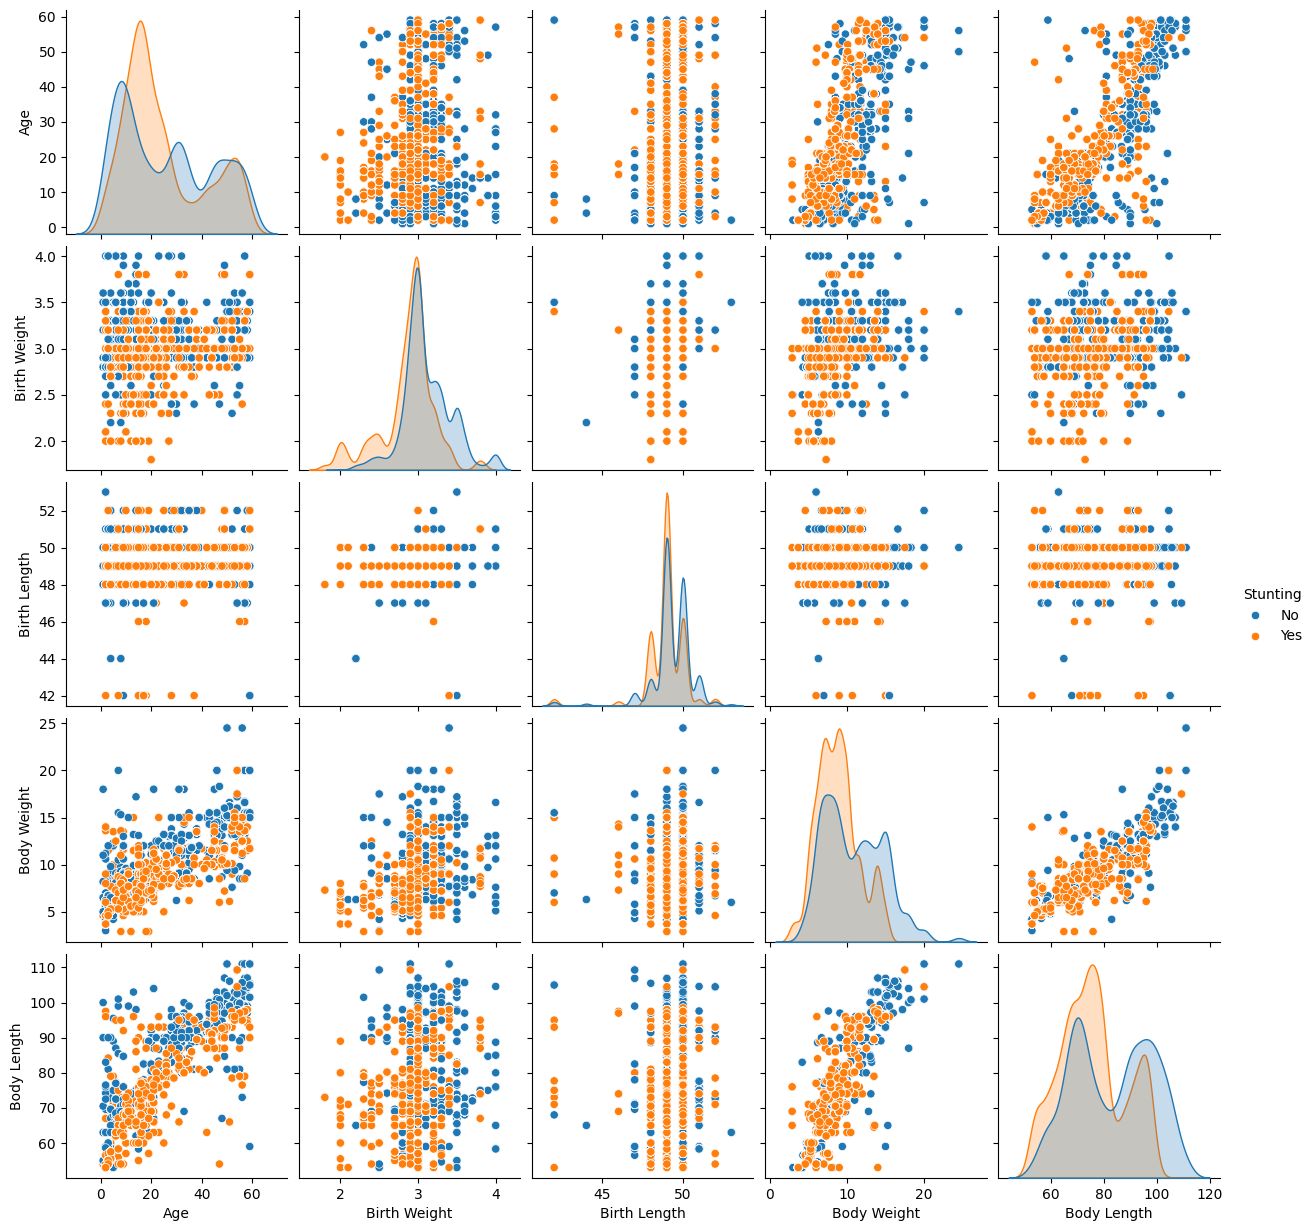

In [ ]:
sns.pairplot(data, hue="Stunting")
plt.show()

# **Preprocessing Data**

**LABEL ENCODING**

In [ ]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Breastfeeding'] = le.fit_transform(data['Breastfeeding'])
data['Stunting'] = le.fit_transform(data['Stunting'])

In [ ]:
data.head(10)

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,0,56,2.9,50,11.0,90.0,1,0
1,0,20,3.3,49,11.1,80.5,0,0
2,1,4,2.8,48,6.5,63.0,0,0
3,0,14,2.0,49,7.0,71.0,1,0
4,1,32,3.2,49,11.0,88.7,1,0
5,1,30,2.3,50,12.0,90.0,1,0
6,1,2,2.9,49,8.5,74.2,1,0
7,1,33,2.5,49,10.0,91.5,0,1
8,1,33,3.0,50,15.0,96.0,1,0
9,0,15,4.0,51,5.9,58.3,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         6500 non-null   int64  
 1   Age            6500 non-null   int64  
 2   Birth Weight   6500 non-null   float64
 3   Birth Length   6500 non-null   int64  
 4   Body Weight    6500 non-null   float64
 5   Body Length    6500 non-null   float64
 6   Breastfeeding  6500 non-null   int64  
 7   Stunting       6500 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 406.4 KB


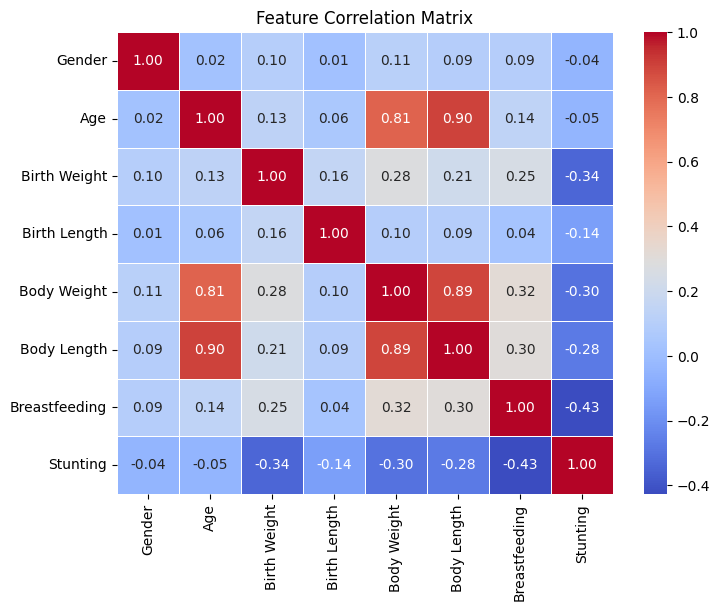

In [ ]:
# Menghitung korelasi
corr = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

**MENGHAPUS KOLOM TARGET**

In [ ]:
X = data.drop(columns='Stunting')
y = data['Stunting']

**NORMALIZATION DATA**

In [ ]:
print("Data Sebelum di Normalisasi")
display(X.head())

Data Sebelum di Normalisasi


,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding
0,0,56,2.9,50,11.0,90.0,1
1,0,20,3.3,49,11.1,80.5,0
2,1,4,2.8,48,6.5,63.0,0
3,0,14,2.0,49,7.0,71.0,1
4,1,32,3.2,49,11.0,88.7,1


In [ ]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

In [ ]:
print("Data Sesudah Normalisasi")
display(X_normalized_df.head())

Data Sesudah Normalisasi


,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding
0,0.0,0.948276,0.500000,0.727273,0.375000,0.637931,1.0
1,0.0,0.327586,0.681818,0.636364,0.379630,0.474138,0.0
2,1.0,0.051724,0.454545,0.545455,0.166667,0.172414,0.0
3,0.0,0.224138,0.090909,0.636364,0.189815,0.310345,1.0
4,1.0,0.534483,0.636364,0.636364,0.375000,0.615517,1.0


**SPLITTING DATA**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.1, random_state=42)

In [ ]:
print(X_train)

      Gender       Age  Birth Weight  Birth Length  Body Weight  Body Length  \
1038     0.0  0.568966      0.545455      0.636364     0.259259     0.517241   
1934     0.0  0.431034      0.636364      0.636364     0.375000     0.560345   
6022     0.0  0.327586      0.454545      0.636364     0.180556     0.275862   
2758     0.0  0.810345      0.545455      0.636364     0.504630     0.775862   
5162     1.0  0.017241      0.727273      0.000000     0.143519     0.000000   
...      ...       ...           ...           ...          ...          ...   
3772     0.0  0.982759      0.727273      0.636364     0.513889     0.775862   
5191     0.0  0.258621      0.500000      0.636364     0.282407     0.413793   
5226     0.0  0.293103      0.681818      0.636364     0.199074     0.241379   
5390     1.0  0.241379      0.454545      0.636364     0.328704     0.310345   
860      1.0  0.155172      0.545455      0.636364     0.217593     0.306897   

      Breastfeeding  
1038            0

In [ ]:
len(X_train)

5850

In [ ]:
print(X_test)

      Gender       Age  Birth Weight  Birth Length  Body Weight  Body Length  \
3106     0.0  0.034483      0.454545      0.636364     0.087963     0.120690   
6161     1.0  0.275862      0.727273      0.000000     0.282407     0.379310   
1867     0.0  0.827586      0.500000      0.636364     0.606481     0.758621   
3238     0.0  0.017241      0.681818      0.545455     0.152778     0.096552   
5509     1.0  0.275862      0.727273      0.000000     0.282407     0.379310   
...      ...       ...           ...           ...          ...          ...   
5206     0.0  0.258621      0.500000      0.727273     0.203704     0.155172   
2759     1.0  0.051724      0.409091      0.636364     0.134259     0.286207   
6258     0.0  0.465517      0.590909      0.545455     0.259259     0.301724   
3886     1.0  0.413793      0.545455      0.727273     0.476852     0.620690   
259      0.0  0.534483      0.636364      0.727273     0.328704     0.586207   

      Breastfeeding  
3106            1

In [ ]:
len(X_test)

650

In [ ]:
for column in X.columns:
    print(f"Fitur {column}:")
    print(f"Mean: {X[column].mean()}")
    print(f"Min: {X[column].min()}")
    print(f"Max: {X[column].max()}")
    print(f"Standard Deviation: {X[column].std()}")
    print(f"Skewness: {skew(X[column])}")
    print(f"Kurtosis: {kurtosis(X[column])}")
    print("-")

Fitur Gender:
Mean: 0.49523076923076925
Min: 0
Max: 1
Standard Deviation: 0.5000157181474808
Skewness: 0.01907779096682346
Kurtosis: -1.9996360378918265
-
Fitur Age:
Mean: 25.222
Min: 1
Max: 59
Standard Deviation: 16.96117891217414
Skewness: 0.5446349645419607
Kurtosis: -0.9956922745839765
-
Fitur Birth Weight:
Mean: 2.9850923076923075
Min: 1.8
Max: 4.0
Standard Deviation: 0.3499555825717154
Skewness: -0.3273666919780201
Kurtosis: 1.6277928202580432
-
Fitur Birth Length:
Mean: 49.136923076923075
Min: 42
Max: 53
Standard Deviation: 1.2585536520964182
Skewness: -2.4233004935752156
Kurtosis: 12.907139144266754
-
Fitur Body Weight:
Mean: 9.80976923076923
Min: 2.9
Max: 24.5
Standard Deviation: 3.4599524435317033
Skewness: 0.7233447481492151
Kurtosis: 0.3431825980597605
-
Fitur Body Length:
Mean: 79.38978461538461
Min: 53.0
Max: 111.0
Standard Deviation: 14.073021061155655
Skewness: 0.19293490921673806
Kurtosis: -0.9635345385976422
-
Fitur Breastfeeding:
Mean: 0.4490769230769231
Min: 0
Max: 

# **ALGORITMA K-NEAREST NEIGHBOR**

**Pelatihan Model K-Nearest Neighbor dengan Parameter Default**

In [ ]:
zknn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn_default = knn.predict(X_test)

In [ ]:
accuracy_knn_default = accuracy_score(y_test, y_pred_knn_default)
print("Accuracy Model K-Nearest Neighbor dengan Parameter Default: {:.2%}".format(accuracy_knn_default))

Accuracy Model K-Nearest Neighbor dengan Parameter Default: 96.77%


In [ ]:
report = classification_report(y_test, y_pred_knn_default, output_dict=True)
for key in report:
  if isinstance(report[key], dict):
    for metric in report[key]: report[key][metric] = np.round(report[key][metric], 5)

In [ ]:
for label, metrics in report.items():
    if isinstance(metrics, dict):
        print(f"{label}:")
        for metric, value in metrics.items():
            print(f"  {metric}: {value}")
    else:
        print(f"{label}: {metrics}")

0:
  precision: 0.96636
  recall: 0.96933
  f1-score: 0.96784
  support: 326.0
1:
  precision: 0.96904
  recall: 0.96605
  f1-score: 0.96754
  support: 324.0
accuracy: 0.9676923076923077
macro avg:
  precision: 0.9677
  recall: 0.96769
  f1-score: 0.96769
  support: 650.0
weighted avg:
  precision: 0.9677
  recall: 0.96769
  f1-score: 0.96769
  support: 650.0


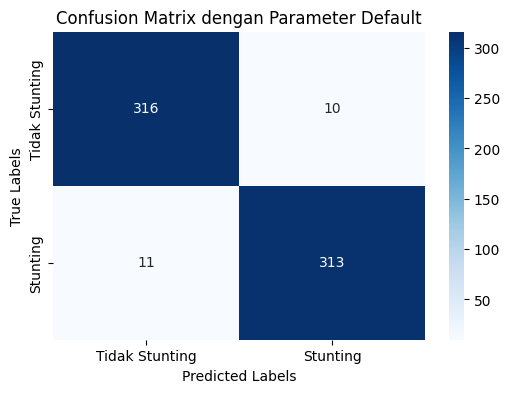

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn_default)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Tidak Stunting", "Stunting"], yticklabels=["Tidak Stunting", "Stunting"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix dengan Parameter Default')
plt.show()

**Pelatihan Model K-Nearest Neighbor dengan Tuning Parameter Grid Search**

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

In [ ]:
knn_grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

In [ ]:
knn_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [ ]:
best_params = knn_grid_search.best_params_

In [ ]:
print(f"Best parameters: {knn_grid_search.best_params_}")

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [ ]:
best_knn = knn_grid_search.best_estimator_

In [ ]:
y_pred_best_knn = best_knn.predict(X_test)

In [ ]:
accuracy_knn_grid_search = accuracy_score(y_test, y_pred_best_knn)
print("Accuracy Model K-Nearest Neighbor dengan Parameter Grid Search: {:.2%}".format(accuracy_knn_grid_search))

Accuracy Model K-Nearest Neighbor dengan Parameter Grid Search: 97.23%


In [ ]:
import joblib

best_knn = knn_grid_search.best_estimator_

joblib.dump(best_knn, "model.pkl")
print("Model terbaik GridSearch berhasil disimpan sebagai model.pkl")


Model terbaik GridSearch berhasil disimpan sebagai model.pkl


In [ ]:
report = classification_report(y_test, y_pred_best_knn, output_dict=True)
for key in report:
  if isinstance(report[key], dict):
    for metric in report[key]: report[key][metric] = np.round(report[key][metric], 5)

In [ ]:
for label, metrics in report.items():
    if isinstance(metrics, dict):
        print(f"{label}:")
        for metric, value in metrics.items():
            print(f"  {metric}: {value}")
    else:
        print(f"{label}: {metrics}")

0:
  precision: 0.97531
  recall: 0.96933
  f1-score: 0.97231
  support: 326.0
1:
  precision: 0.96933
  recall: 0.97531
  f1-score: 0.97231
  support: 324.0
accuracy: 0.9723076923076923
macro avg:
  precision: 0.97232
  recall: 0.97232
  f1-score: 0.97231
  support: 650.0
weighted avg:
  precision: 0.97233
  recall: 0.97231
  f1-score: 0.97231
  support: 650.0


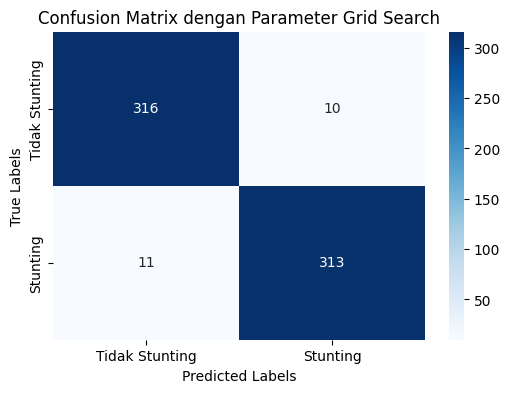

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Tidak Stunting", "Stunting"], yticklabels=["Tidak Stunting", "Stunting"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix dengan Parameter Grid Search')
plt.show()